## What is SpaCy?

From the following URL: https://spacy.io/usage/spacy-101

SpaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

## What spaCy isn’t
- spaCy is not a platform or “an API”. Unlike a platform, spaCy does not provide a software as a service, or a web application. It’s an open-source library designed to help you build NLP applications, not a consumable service.

- spaCy is not an out-of-the-box chat bot engine. While spaCy can be used to power conversational applications, it’s not designed specifically for chat bots, and only provides the underlying text processing capabilities.

- spaCy is not research software. It’s built on the latest research, but it’s designed to get things done. This leads to fairly different design decisions than NLTK or CoreNLP, which were created as platforms for teaching and research. The main difference is that spaCy is integrated and opinionated. spaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets spaCy deliver generally better performance and developer experience.

- spaCy is not a company. It’s an open-source library. Our company publishing spaCy and other software is called Explosion.

-----------------------

## Here are 4 things SpaCy can be used for:

- Information Extraction: SpaCy can be used to identify and extract specific details from text, like names of people and organizations (Named Entity Recognition), dates, locations, and other relevant information. This can be useful for tasks like populating databases or summarizing documents.

- Text Cleaning and Preprocessing: Before feeding text into machine learning models, it often needs cleaning and preprocessing. SpaCy can help with tasks like tokenization (breaking text into words), sentence segmentation, removing stop words (common words like "the" and "a"), and lemmatization (converting words to their base form).

- Natural Language Understanding (NLU): SpaCy can be used to gain a deeper understanding of the structure and meaning of text. This includes tasks like part-of-speech tagging (identifying nouns, verbs, adjectives, etc.) and dependency parsing (understanding the relationships between words in a sentence). These can be useful for tasks like building chatbots or sentiment analysis.

- Custom Text Analysis Tasks: SpaCy's flexibility allows you to create custom rules and pipelines to analyze text in specific ways. This lets you tackle tasks unique to your project, like identifying technical jargon or specific entities relevant to your field.

I'm going to follow FreeCodeCamp's SpaCy & Python tutorial from here: https://youtu.be/dIUTsFT2MeQ?si=oJXhiXIndDa2Erfc

Data source: https://github.com/wjbmattingly/freecodecamp_spacy

## Imports & Setup

In [278]:
import spacy
from spacy.matcher import Matcher
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json

## SpaCy Building Blocks

In [279]:
# Create sample text:
corpus = "This is a test sentence for the SpaCy workbook. It is to confirm that the English SpaCy module is downloaded."

# Instantiate an NLP model for English from SpaCy:
nlp_model = spacy.load("en_core_web_sm")

# Create a document:
document = nlp_model(corpus)

# View document:
print(document)

This is a test sentence for the SpaCy workbook. It is to confirm that the English SpaCy module is downloaded.


In [280]:
# Load data from acquired data folder:
with open ("data/wiki_us.txt", "r") as f:
    corpus = f.read()

# Create document object:
document_us = nlp_model(corpus)
print(document_us)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

In [281]:
# Compare text and document length:
print(len(corpus))
print(len(document_us))

3521
654


In [282]:
# Just printing the tokens of the corpus prints individual letters.
# What about the document? It should print whole words instead.
for token in document_us[0:10]:
    print(token)

# Using this model from SpaCy instead of just using a .split() python function...
# is good because it can automatically filter out punctuation.

The
United
States
of
America
(
U.S.A.
or
USA
)


In [283]:
# Sentence boundary detection (SBD):
for sent in document_us.sents:
    print(sent)

# The above function separates out whole sentences using an iterator.

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22]
With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

In [284]:
# Move forward with one of those sentences.
# Can't print directly because it's a generator object.
# Convert to list to print:
sentence_1 = list(document_us.sents)[0]
print(sentence_1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [285]:
# Token attributes:
token_2 = sentence_1[2]
print(token_2.text) # extract text from token.
print(token_2.left_edge) # left-most token corresponding to selected token.
print(token_2.right_edge) # right-most token corresponding to selected token.

# Token entity type:
token_2.ent_type_ # string corresponding to token type, in this case 'geopolitical entity (GPE)'

States
The
America


'GPE'

In [286]:
# Is this token inside, before, or outside a larger entity?
token_2.ent_iob_
# Output 'I' means "inside", i.e. The United *States* of America.

'I'

In [287]:
# Lemma/root form of the selected word token:
print(token_2.lemma_)

# States is a noun, how does lemma_ handle a verb?
print(sentence_1)
print(sentence_1[12].lemma_) # lemma form of 'known'

States
The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
know


In [288]:
# Morphological analysis: 
print('Morph of "States": ', token_2.morph)
print('Morph of Sentence1: ', sentence_1[12].morph) # 'known'
# Morph of 'know' is a "perfect past participle."

Morph of "States":  Number=Sing
Morph of Sentence1:  Aspect=Perf|Tense=Past|VerbForm=Part


In [289]:
# Part of Speech (PoS):
print('POS of "States": ', token_2.pos_)
# 'PROPN' means 'proper noun'.

# What is its dependency relation?
print('Dependency Relation of "States" :', token_2.dep_)
# NSUBJ means 'noun subject'

# What language is the token?
print('Language of "States":', token_2.lang_)
# en obviously means English.

POS of "States":  PROPN
Dependency Relation of "States" : nsubj
Language of "States": en


In [290]:
# PoS tagging:
corpus_2 = "Oliver prefers working in data science these days!"
doc_2 = nlp_model(corpus_2)
for token in doc_2:
    print(token.text, token.pos_, token.dep_)

Oliver PROPN nsubj
prefers VERB ROOT
working VERB xcomp
in ADP prep
data NOUN compound
science NOUN pobj
these DET det
days NOUN npadvmod
! PUNCT punct


In [291]:
# Let's visualize the above output to make it more comprehensible:
from spacy import displacy
displacy.render(doc_2, style="dep")
print('For a complete list of the PoS labels and their meaning,\nread the spaCy documentation (https://spacy.io/api/annotation#pos-tagging).')

For a complete list of the PoS labels and their meaning,
read the spaCy documentation (https://spacy.io/api/annotation#pos-tagging).


In [292]:
# Named Entity Recognition (NER):
for ent in document_us.ents:
    print(ent.text, ent.label_)

# The above prints off all the entities and their labels for each word in the doc.
# If you read through them all, there are a couple mistakes... 
# E.g. the US Revolutionary War being identified as an organization, not an event.

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
326 CARDINAL
Indian NORP
3.8 million square miles QUANTITY
9.8 million square kilometers QUANTITY
fourth ORDINAL
The United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
more than 331 million CARDINAL
third ORDINAL
Washington GPE
D.C. GPE
New York GPE
Paleo-Indians NORP
Siberia LOC
North American NORP
at least 12,000 years ago DATE
European NORP
the 16th century DATE
The United States GPE
thirteen CARDINAL
British NORP
the East Coast LOC
Great Britain GPE
the American Revolutionary War ORG
the late 18th century DATE
U.S. GPE
North America LOC
Native Americans NORP
1848 DATE
the United States GPE
United States GPE
the second half of the 19th century DATE
the American Civil War ORG
Spanish NORP
World War EVENT
U.S. GPE
World War II EVENT
the Cold War EVENT
the United States GPE
the Korean War EVENT
the Vietnam War EVENT
the Soviet Union

In [293]:
# We can visualize this again using Displacy:
displacy.render(document_us, style="ent")

In [294]:
# Load and run larger medium English model from spaCy to start working on word vectors:
nlp_model_2 = spacy.load("en_core_web_md")
with open ("data/wiki_us.txt", "r") as f:
    text = f.read()
doc = nlp_model_2(text)
sentence1 = list(doc.sents)[0]
print('Test: ', sentence_1)

Test:  The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


In [295]:
# Look at work embeddings:
word = 'country'
ms = nlp_model_2.vocab.vectors.most_similar(np.asarray([
    nlp_model_2.vocab.vectors[nlp_model_2.vocab.strings[word]]]), n = 15)
words = [nlp_model_2.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)
print("These words are supposed to be similar to 'country' but will not always be synonyms! E.g. they often occur in similar expressions.")

['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters', 'Sabally', 'world&rsquo', 'virginities', 'regidores', 'Patate']
These words are supposed to be similar to 'country' but will not always be synonyms! E.g. they often occur in similar expressions.


In [296]:
# Calculate document similarity:
doc_sim_1 = nlp_model_2("I like salty fries with my burgers.")
doc_sim_2 = nlp_model_2("Fast food tastes great!")
print(doc_sim_1, "<->", doc_sim_2, '\nDocument Similarity: ', doc_sim_1.similarity(doc_sim_2))

I like salty fries with my burgers. <-> Fast food tastes great! 
Document Similarity:  0.5263022053797987


In [297]:
# What about a more different one?
doc_sim_3 = nlp_model_2("The United Kingdom meets the NATO spending target for this year.")
print(doc_sim_1, "<->", doc_sim_3, '\nDocument Similarity: ', doc_sim_1.similarity(doc_sim_3))

I like salty fries with my burgers. <-> The United Kingdom meets the NATO spending target for this year. 
Document Similarity:  0.30570381482198083


## SpaCy Pipelines

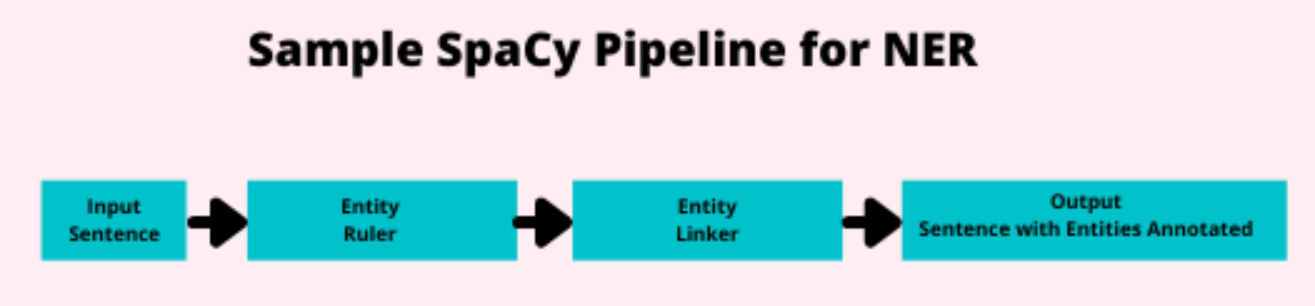

In [298]:
# Build the pipeline:
nlp_pipe = spacy.load("en_core_web_md")
nlp_pipe.add_pipe("sentencizer")
nlp_pipe.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sen

In [299]:
# SpaCy EntityRuler:
corpus_3 = "West Chestertenfieldville is referenced in the movie Mr. Deeds."
doc_ex2 = nlp_model_2(corpus_3)
for ent in doc_ex2.ents:
    print(ent.text, ent.label_)

# Adding an entity ruler before NER:
ruler = nlp_model_2.add_pipe("entity_ruler", before="ner")
nlp_model_2.analyze_pipes()

West Chestertenfieldville LOC
Deeds PERSON


{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [300]:
# Adding patterns (always a list of dictionaries):
patterns = [{"label": "GPE",
            "pattern": "West Chestertenfieldville",
            "label": "FILM",
            "pattern": "Mr. Deeds"}]

# Add to EntityRuler:
ruler.add_patterns(patterns)

# Run modified pipeline on old sample text:
doc_ex2 = nlp_model_2(corpus_3)
for ent in doc_ex2.ents:
    print(ent.text, ent.label_)

West Chestertenfieldville LOC
Mr. Deeds FILM


In [301]:
# Starting with spaCy Matcher:
nlp = spacy.load("en_core_web_md")
matcher = Matcher(nlp.vocab)
pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL_ADDRESS", [pattern])
doc = nlp("This is an email address: wmattingly@aol.com")
matches = matcher(doc)
print(matches)
print('[(Lexeme, start token, end token)]')

[(16571425990740197027, 6, 7)]
[(Lexeme, start token, end token)]


In [302]:
# Showcase the use of the above lexeme:
print(nlp.vocab[matches[0][0]].text)

EMAIL_ADDRESS


In [303]:
# Read in new sample text:
with open ("data/wiki_mlk.txt", "r") as f:
    text = f.read()
print(text)

Martin Luther King Jr. (born Michael King Jr.; January 15, 1929 – April 4, 1968) was an American Baptist minister and activist who became the most visible spokesman and leader in the American civil rights movement from 1955 until his assassination in 1968. King advanced civil rights through nonviolence and civil disobedience, inspired by his Christian beliefs and the nonviolent activism of Mahatma Gandhi. He was the son of early civil rights activist and minister Martin Luther King Sr.

King participated in and led marches for blacks' right to vote, desegregation, labor rights, and other basic civil rights.[1] King led the 1955 Montgomery bus boycott and later became the first president of the Southern Christian Leadership Conference (SCLC). As president of the SCLC, he led the unsuccessful Albany Movement in Albany, Georgia, and helped organize some of the nonviolent 1963 protests in Birmingham, Alabama. King helped organize the 1963 March on Washington, where he delivered his famous 

In [304]:
# Instantiate and run new model to grab multi-word tokens:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern])
doc = nlp(text)
matches = matcher(doc)
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
print('[(Lexeme, start token, end token)]')

(3232560085755078826, 0, 1) Martin
(3232560085755078826, 0, 2) Martin Luther
(3232560085755078826, 1, 2) Luther
(3232560085755078826, 0, 3) Martin Luther King
(3232560085755078826, 1, 3) Luther King
(3232560085755078826, 2, 3) King
(3232560085755078826, 0, 4) Martin Luther King Jr.
(3232560085755078826, 1, 4) Luther King Jr.
(3232560085755078826, 2, 4) King Jr.
(3232560085755078826, 3, 4) Jr.
[(Lexeme, start token, end token)]


In [305]:
# What if I want the longest tokens?
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
print('[(Lexeme, start token, end token)]')

(3232560085755078826, 83, 88) Martin Luther King Sr.
(3232560085755078826, 469, 474) Martin Luther King Jr. Day
(3232560085755078826, 536, 541) Martin Luther King Jr. Memorial
(3232560085755078826, 0, 4) Martin Luther King Jr.
(3232560085755078826, 128, 132) Southern Christian Leadership Conference
(3232560085755078826, 247, 251) Director J. Edgar Hoover
(3232560085755078826, 6, 9) Michael King Jr.
(3232560085755078826, 325, 328) Nobel Peace Prize
(3232560085755078826, 422, 425) James Earl Ray
(3232560085755078826, 463, 466) Congressional Gold Medal
[(Lexeme, start token, end token)]


In [306]:
# Let's sort those outputs sequentially:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]
matcher.add("PROPER_NOUNS", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1]) # sorts by index order
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
print('[(Lexeme, start token, end token)]')

(3232560085755078826, 89, 91) King participated
(3232560085755078826, 113, 115) King led
(3232560085755078826, 247, 252) Director J. Edgar Hoover considered
(3232560085755078826, 322, 324) King won
(3232560085755078826, 485, 488) United States beginning
[(Lexeme, start token, end token)]


In [307]:
# What if I want to look for verbs to extract info about MLK's actions?
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]
matcher.add("PROPER_NOUNS", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1]) # sorts by index order
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
print('[(Lexeme, start token, end token)]')

(3232560085755078826, 89, 91) King participated
(3232560085755078826, 113, 115) King led
(3232560085755078826, 247, 252) Director J. Edgar Hoover considered
(3232560085755078826, 322, 324) King won
(3232560085755078826, 485, 488) United States beginning
[(Lexeme, start token, end token)]


In [313]:
# Let's test this out on a new sample text:
with open ("data/alice.json", "r") as f:
    data = json.load(f)
print(data)

# Let's get some cleaner text data instead of using a direct print:
text = data[0][2][0]
# Replace strange format apostrophe so it does not trip models up:
text = text.replace("`", "'")
print(text)

[['CHAPTER I', 'Down the Rabbit-Hole', ["Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'", 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.', "There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually TOOK A WATCH OUT OF 

In [316]:
# Let's extract some of Alice's dialogue from this:
matcher = Matcher(nlp.vocab)
pattern = [{"ORTH": "'"},
            {"IS_ALPHA": True, "OP": "+"},
            {"IS_PUNCT": True, "OP": "*"},
            {"ORTH": "'"}]
matcher.add("PROPER_NOUNS", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1]) # sorts by index order
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
print('[(Lexeme, start token, end token)]')

(3232560085755078826, 47, 58) 'and what is the use of a book,'
(3232560085755078826, 60, 67) 'without pictures or conversation?'
[(Lexeme, start token, end token)]


In [317]:
# What if we want to find dialogue that has forms of 'say' or 'think' in it?
speak_lemmas = ["think", "say"]
text = data[0][2][0].replace( "`", "'")
matcher = Matcher(nlp.vocab)
pattern1 = [{'ORTH': "'"}, 
            {'IS_ALPHA': True, "OP": "+"}, 
            {'IS_PUNCT': True, "OP": "*"}, 
            {'ORTH': "'"}, 
            {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, 
            {"POS": "PROPN", "OP": "+"}, 
            {'ORTH': "'"}, 
            {'IS_ALPHA': True, "OP": "+"}, 
            {'IS_PUNCT': True, "OP": "*"}, 
            {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern1], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

1
(3232560085755078826, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


In [321]:
# Can we use that to iterate over the entire chapter of the Alice book?
# Need to add generalized patterns to capture more variance in text:
speak_lemmas = ["think", "say"]
text = data[0][2][0].replace( "`", "'")
matcher = Matcher(nlp.vocab)
pattern1 = [{'ORTH': "'"}, 
            {'IS_ALPHA': True, "OP": "+"}, 
            {'IS_PUNCT': True, "OP": "*"}, 
            {'ORTH': "'"}, 
            {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, 
            {"POS": "PROPN", "OP": "+"}, 
            {'ORTH': "'"}, 
            {'IS_ALPHA': True, "OP": "+"}, 
            {'IS_PUNCT': True, "OP": "*"}, 
            {'ORTH': "'"}]
pattern2 = [{'ORTH': "'"}, 
            {'IS_ALPHA': True, "OP": "+"}, 
            {'IS_PUNCT': True, "OP": "*"}, 
            {'ORTH': "'"}, 
            {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, 
            {"POS": "PROPN", "OP": "+"}]
pattern3 = [{"POS": "PROPN", "OP": "+"},
            {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, 
            {'ORTH': "'"}, 
            {'IS_ALPHA': True, "OP": "+"}, 
            {'IS_PUNCT': True, "OP": "*"}, 
            {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern1, pattern2, pattern3], greedy='LONGEST')
for text in data[0][2]:
    text = text.replace("`", "'")
    doc = nlp(text)
    matches = matcher(doc)
    matches.sort(key = lambda x: x[1])
    print (len(matches))
    for match in matches[:10]:
        print (match, doc[match[1]:match[2]])

print("\nAre you starting to see the value of using a Matcher to comb through text?")

1
(3232560085755078826, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'
0
0
0
0
0
1
(3232560085755078826, 0, 6) 'Well!' thought Alice
0
0
0
0
0
0
0
1
(3232560085755078826, 57, 68) 'which certainly was not here before,' said Alice
0
0

Are you starting to see the value of using a Matcher to comb through text?


## Custom Components in SpaCy: